In [156]:
# Dependencies and Setup
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import nltk

# Read the CSV and Perform Basic Data Cleaning

In [157]:
#  0 stands for NOT depressed and 1 stands for Depressed
Twitter_df= pd.read_csv("sentiment_tweets.csv")
Twitter_df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [158]:
Twitter_df.shape

(10314, 3)

In [159]:
Twitter_df.isnull().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

In [160]:
Twitter_df['message to examine'] = Twitter_df['message to examine'].str.lower()
Twitter_df

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat need to send 'em to my accountant tomo...,0
4,540,add me on myspace!!! myspace.com/lookthunder,0
...,...,...,...
10309,802309,no depression by g herbo is my mood from now o...,1
10310,802310,what do you do when depression succumbs the br...,1
10311,802311,ketamine nasal spray shows promise against dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [161]:
# Remove URLs from a sample string
def remove_URL(text):
        return re.sub(r'http\S+', "", text)
    
Twitter_df['message to examine'] = Twitter_df['message to examine'].apply(lambda x: remove_URL(x))
Twitter_df

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga,0
2,220,@comeagainjen -,0
3,288,@lapcat need to send 'em to my accountant tomo...,0
4,540,add me on myspace!!! myspace.com/lookthunder,0
...,...,...,...
10309,802309,no depression by g herbo is my mood from now o...,1
10310,802310,what do you do when depression succumbs the br...,1
10311,802311,ketamine nasal spray shows promise against dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [162]:
Twitter_df.loc[(Twitter_df!=0).any(1)]
# len(Twitter_df)
Twitter_df

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga,0
2,220,@comeagainjen -,0
3,288,@lapcat need to send 'em to my accountant tomo...,0
4,540,add me on myspace!!! myspace.com/lookthunder,0
...,...,...,...
10309,802309,no depression by g herbo is my mood from now o...,1
10310,802310,what do you do when depression succumbs the br...,1
10311,802311,ketamine nasal spray shows promise against dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [163]:
#remove twitter mentions
def remove_mentions(text):
  return re.sub(r'@\w+', '', text)

Twitter_df['message to examine'] = Twitter_df['message to examine'].apply(lambda x: remove_mentions(x))
Twitter_df

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga,0
2,220,-,0
3,288,need to send 'em to my accountant tomorrow. o...,0
4,540,add me on myspace!!! myspace.com/lookthunder,0
...,...,...,...
10309,802309,no depression by g herbo is my mood from now o...,1
10310,802310,what do you do when depression succumbs the br...,1
10311,802311,ketamine nasal spray shows promise against dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [164]:
#remove punctuation
def remove_punctuation(text):
  return re.sub(r'[^\w\s]', '', text)

Twitter_df['message to examine'] = Twitter_df['message to examine'].apply(lambda x: remove_punctuation(x))
Twitter_df

,Index,message to examine,label (depression result)
0,106,just had a real good moment i missssssssss him...,0
1,217,is reading manga,0
2,220,,0
3,288,need to send em to my accountant tomorrow odd...,0
4,540,add me on myspace myspacecomlookthunder,0
...,...,...,...
10309,802309,no depression by g herbo is my mood from now o...,1
10310,802310,what do you do when depression succumbs the br...,1
10311,802311,ketamine nasal spray shows promise against dep...,1
10312,802312,dont mistake a bad day with depression everyon...,1


In [165]:
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pino\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [166]:
Twitter_df['message to examine'] = Twitter_df['message to examine'].apply(lambda x: remove_stopwords(x))
Twitter_df.tail()

,Index,message to examine,label (depression result)
10309,802309,depression g herbo mood im done stressing peop...,1
10310,802310,depression succumbs brain makes feel like youl...,1
10311,802311,ketamine nasal spray shows promise depression ...,1
10312,802312,dont mistake bad day depression everyone em,1
10313,802313,0,1


In [167]:
#remove Numbers
def remove_punctuation(text):
  return re.sub(r'[0-9]+', '', text)

# Twitter_df['message to examine'] = Twitter_df['message to examine'].str.replace('\d+', '')
Twitter_df.rename(columns = {'message to examine':'Tweets','label (depression result)':'Label'}, inplace = True)
Twitter_df

,Index,Tweets,Label
0,106,real good moment missssssssss much,0
1,217,reading manga,0
2,220,,0
3,288,need send em accountant tomorrow oddly wasnt e...,0
4,540,add myspace myspacecomlookthunder,0
...,...,...,...
10309,802309,depression g herbo mood im done stressing peop...,1
10310,802310,depression succumbs brain makes feel like youl...,1
10311,802311,ketamine nasal spray shows promise depression ...,1
10312,802312,dont mistake bad day depression everyone em,1


In [168]:
# Twitter_df = Twitter_df.dropna()
# len(Twitter_df)

In [169]:
Twitter_df.to_csv("twitter_clean.csv", index=False)

In [170]:
tweets = Twitter_df['Tweets'].tolist()
len(tweets)

10314

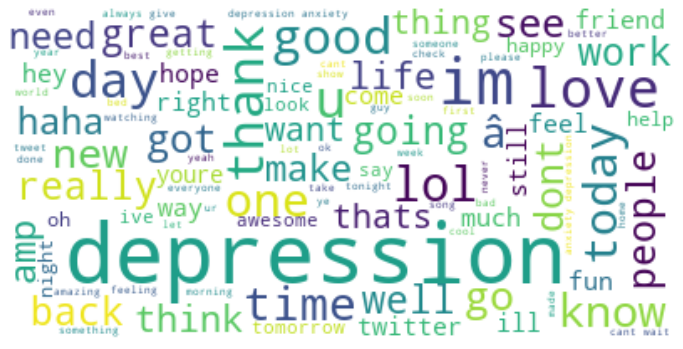

In [171]:
# Combining all the tweets

combined_tweets = " ".join(tweets)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(combined_tweets)
plt.figure(figsize = (12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# Save the image in the img folder:
wordcloud.to_file("sentiment.png")

In [172]:
positive_tweets = Twitter_df[Twitter_df['Label'] == 0]
positive_message= positive_tweets['Tweets'].tolist()
combined_positive_tweets = " ".join(positive_message)

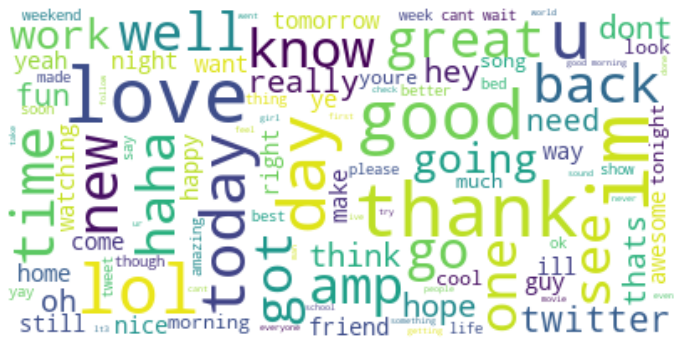

In [173]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(combined_positive_tweets)
plt.figure(figsize = (12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# Save the image in the img folder:
wordcloud.to_file("positive.png")

In [174]:
negative_tweets = Twitter_df[Twitter_df['Label'] == 1]
negative_message= negative_tweets ['Tweets'].tolist()
combined_negative_tweets = " ".join(negative_message)

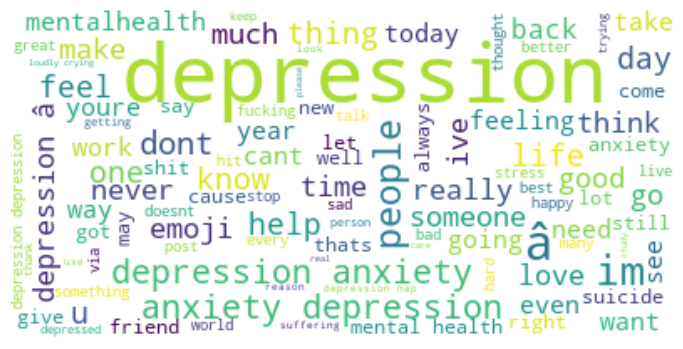

In [175]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(combined_negative_tweets)
plt.figure(figsize = (12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# Save the image in the img folder:
wordcloud.to_file("negative.png")

In [176]:
Twitter_df['tokenized_tweets'] = Twitter_df.apply(lambda row: nltk.word_tokenize(row['Tweets']), axis=1)
Twitter_df

,Index,Tweets,Label,tokenized_tweets
0,106,real good moment missssssssss much,0,"[real, good, moment, missssssssss, much]"
1,217,reading manga,0,"[reading, manga]"
2,220,,0,[]
3,288,need send em accountant tomorrow oddly wasnt e...,0,"[need, send, em, accountant, tomorrow, oddly, ..."
4,540,add myspace myspacecomlookthunder,0,"[add, myspace, myspacecomlookthunder]"
...,...,...,...,...
10309,802309,depression g herbo mood im done stressing peop...,1,"[depression, g, herbo, mood, im, done, stressi..."
10310,802310,depression succumbs brain makes feel like youl...,1,"[depression, succumbs, brain, makes, feel, lik..."
10311,802311,ketamine nasal spray shows promise depression ...,1,"[ketamine, nasal, spray, shows, promise, depre..."
10312,802312,dont mistake bad day depression everyone em,1,"[dont, mistake, bad, day, depression, everyone..."


In [177]:
# X= Twitter_df.tokenized_tweets
# y=Twitter_df.Label
# X

In [178]:
from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(max_df=0.9,min_df=2,max_features=1000)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Twitter_df['Tweets'])
y=Twitter_df.Label


# Create a Train Test Split

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state =42)

In [180]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

# splitting data into training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=2)

In [181]:
X_train[0]

<1x17313 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

# Train the Model

In [182]:
# Fit to the training data and validate with the test data
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [183]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.999861476658817
Testing Data Score: 0.9909531502423263


# Hyperparameter Tuning

Use GridSearchCV to tune the model's parameters

In [184]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [185]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler(with_mean=False).fit(X_train)

In [186]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [187]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.992, total=   2.2s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.988, total=   2.3s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.989, total=   2.4s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.988, total=   2.5s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.990, total=   2.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.992, total=   2.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.988, total=   2.3s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.989, total=   2.4s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.988, total=   2.4s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.7min finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             verbose=3)

In [188]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.0001}
0.9894723404418695


The SVM had a higher accuracy, (0.99). The scores of the hypertuned GridSearch models slightly decreased when compared to the test scores of the regular SVM models.

# Save the model

In [189]:
import joblib
model = 'SVM.sav'
joblib.dump(model, 'SVM.sav')

['SVM.sav']